# 신경망

- 퍼셉트론으로 복잡한 함수도 표현할 수 있다는 것 -> 장점
- 그러나 가중치는 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 한다는 것이다. -> 단점
- 신경망은 위에 단점을 해결할 수 있다. 
- 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 이제부터 살펴볼 신경망의 중요한 성질이다.

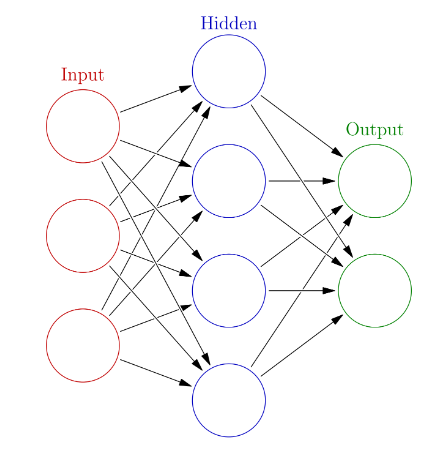

## 3.1 퍼셉트론에서 신경망으로

### 퍼셉트론 복습

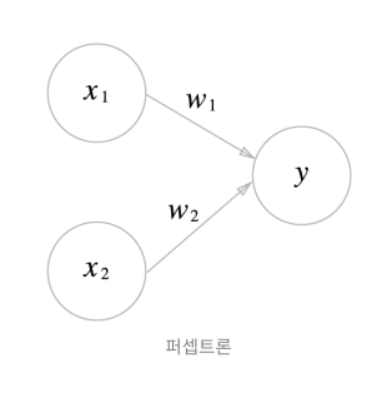

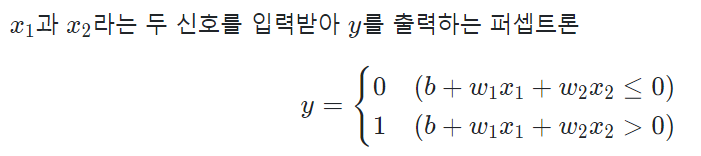

- 편향이라는 매개변수는 뉴런이 얼마나 쉽게 활성화 되느냐를 제어한다.
- w1,w2 가중치 매개변수로, 각 신호의 영향력을 제어한다.

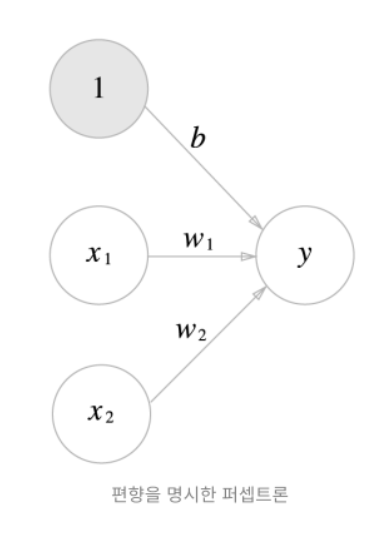

- 편향을 명시한 퍼셉트론 그림

## 신경망의 예

- 신경망을 그림으로 나타내면 

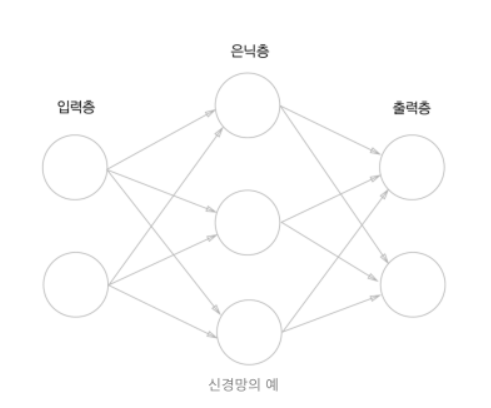

이와 같습니다.

- 여기에 가장 왼쪽 줄을 입력층, 맨 오른쪽 줄을 출력층, 중간 줄은 은닉층이라고 한다.
- 은닉층의 뉴런은 (입력층이나 출력층과 달리) 사람 눈에 보이지 않는 것을 뜻한다,
- 이것을 0층, 1층, 2층이라 왼쪽부터 또 차례대로 나타내면 퍼셉트론과 다른 것은 없어보인다.

## 활성화 함수의 등장 

- h(x)라는 함수 : 활성화 함수
- 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라고 합니다.
- '활성화' : 입력 신호의 총합이 활성화를 일으키는지 정하는 역할


------------------------------------------------------------------------------------------------------------------------------------

- a = b + w1​x1 ​ +w2​x2 ​ ⋯(1)
- y = h(a)⋯(2)

- 식(1)은 가중치가 달린 입력신호와 편향의 총합을 계산하고 이를 a라 함.
- 식(2)는 a를 함수 h()에 넣어 y를 출력.

(1)식은 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 a라 한다. 그리고 식(2)는 a를 함수 h()에 넣어 y를 출력하는 흐름이다.

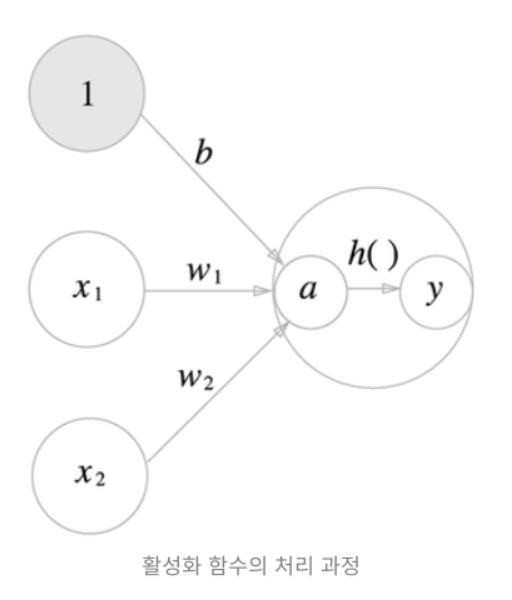

기존 노드의 원을 키우고 그 안에 활성화 함수의 처리과정을 명시적으로 그렸고, 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정 표기한다. 뉴런을 그릴 때 보통은 하나의 원으로 그리지만 신경망의 동작을 더 명확히 드러내고자 할 때는 위의 그림처럼 활성화 과정을 명시

- 단순 퍼셉트론은 단층 네트워크에서 계단함수를 활성화 함수로 사용한 모델을 가리키고 다층 퍼셉트론은 신경망을 가리킴

## 3.2 활성화 함수

- "퍼셉트론"에서는 활성화 함수로 계단함수를 이용한다,
- 활성화 함수를 계단함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 것이다.

### 시그모이드 함수

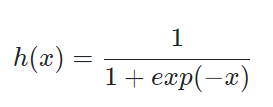

#### 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 활성화 함수뿐! 

- 뉴런이 여러층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 앞에서 살펴본 퍼셉트론과 같다.

In [1]:
# 계단함수 구현하기

def step_function(x):
    if x > 0 :
        return 1
    else :
        return 0 

# x가 실수(부동소수점)만 받아드리는데, 편리하게 바꿔 넘파이 배열에 부등호 연산 수행
def step_function_refine(x):
    y = x > 0
    return y.astype(np.int)

In [2]:
import numpy as np

x = np.array([-1.0,1.0, 2.0])
print(x)

y = x > 0
print(y)


[-1.  1.  2.]
[False  True  True]


In [3]:
# y는 bool 배열이기 때문에 int형으로 바꿔줘야한다.

y = y.astype(np.int)
print(y)

[0 1 1]


C:\Users\aosdb\AppData\Local\Temp\ipykernel_24316\854487356.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


C:\Users\aosdb\AppData\Local\Temp\ipykernel_24316\4119720300.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array( x > 0, dtype = np.int)


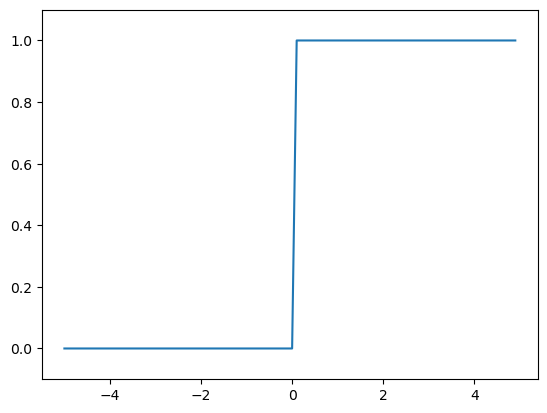

In [4]:
# 계단함수 그래프로 그리기

import matplotlib.pylab as plt

def step_fun(x):
    return np.array( x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_fun(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

In [5]:
# 시그모이드 함수 구현하기 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0 ,1.0 ,2.0])
sigmoid(x)


# 브로드캐스트 : 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행한다. 

array([0.26894142, 0.73105858, 0.88079708])

In [6]:
t = np.array([-1.0, 2.0, 3.0])
1.0 + t 

array([0., 3., 4.])

In [7]:
1.0 / t 

array([-1.        ,  0.5       ,  0.33333333])

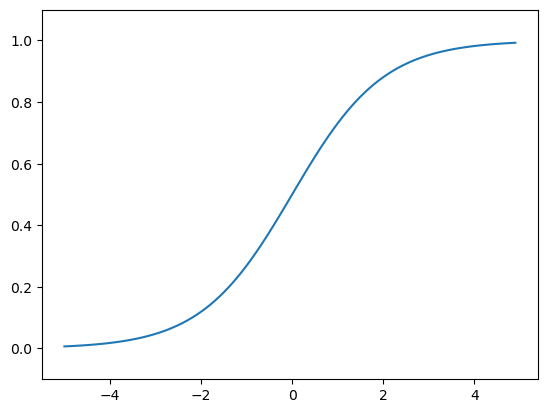

In [8]:
# 시그모이드 함수 그리기 

x = np.arange(-5.0 , 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

## 시그모이드와 계단함수 비교

- 차이점 : 입력에 따라 출력이 연속적으로 변하는 시그모이드 함수, 아닌 계단함수
- 공통점 : 입력이 작을 땐 0 출력, 입력이 커지면 1에 가까워 지는 구조 

## 비선형 함수 

- 계단 함수와 시그모이드 함수는 비선형함수! 
- 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수를 선형 함수라고 한다.
- 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말한다.
- 층을 쌓는 이점을 얻고 싶으면 활성화 함수로 비선형 함수를 사용해야 할 것이다.

# ReLU 함수

- Rectified Linear Unit 함수 
----------------------------------------------------------------------------------------------------------------------------------------
- ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고 0 이하면 0을 출력하는 함수이다.
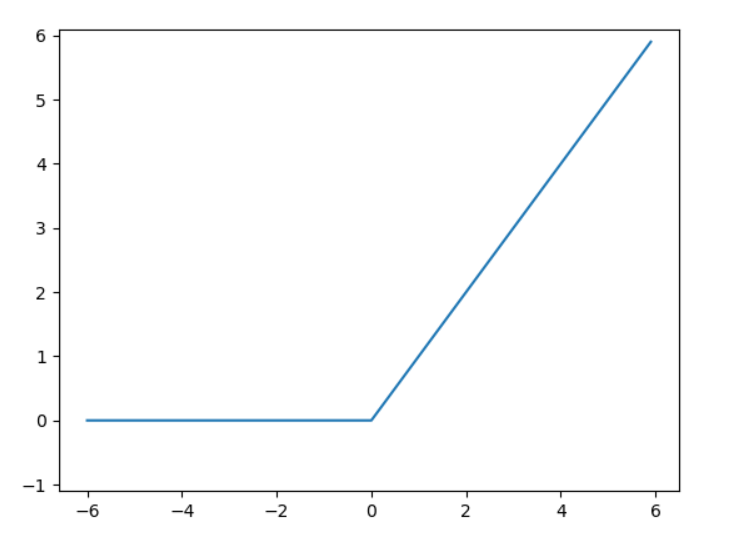



In [9]:
def relu(x):
    return np.maximum(0,x)

# 다차원 배열의 계산

- 넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다.


In [10]:
import numpy as np

A = np.array([1,2,3,4])
print(A)
print()
print(np.ndim(A)) # 배열의 차원수는 np.ndim() 함수로 확인할 수 있다.
print()
print(A.shape) # 튜플로 반환한다. 
print()
print(A.shape[0])

[1 2 3 4]

1

(4,)

4


In [11]:
# 2차원 배열 확인하기

B = np.array([[1,2], [3,4], [5,6]])
print(B)
print()
print(np.ndim(B))
print()
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]

2

(3, 2)


In [12]:
# 행렬의 곱 
A = np.array([[1,2],[3,4]])
print(A.shape)


B = np.array([[5,6],[7,8]])
print(B.shape)

print(np.dot(A,B)) # 두 행렬의 곱 계산
np.dot(B,A)

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


array([[23, 34],
       [31, 46]])

- 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 다르다.
- 2 x 3 , 3 x 2 행렬의 곱을 파이썬으로 구현하는 것을 아래와 같다

In [13]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [14]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [15]:
print(np.dot(A,B))
print()
print(np.dot(B,A))

[[22 28]
 [49 64]]

[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


행렬의 곱은 넘파이 함수 np.dot()으로 계산한다.
np.dot()은 입력이 1차원 배열이면 벡터를, 2차월 배열이면 행렬 곱을 계산한다.

*np.dot(A,B) =! np.dot(B,A)

행렬 A와 행렬 B의 곱이 이뤄지려면 행렬 A의 "열 수"와 행렬 B의 "행 수"가 같아야 한다.

ex) 행렬 A : 3*2 X 행렬 B : 2*4 -> 행렬 C : 3*4

In [16]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

In [17]:
np.dot(B,A) # 대응하는 차원 수가 일치하지 않음


ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

## 3.3.3 신경망에서의 행렬 곱 

- X,Y,W 각각 대응하는 차원의 원소 수가 같아야 한다는 것을 잊지 말아야한다.

In [ ]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print(Y)


'''만약 np.dot을 사용하지 않으면 Y의 원소를 하나씩 따져봐야한다. ( 또는 for문을 사용해서 계산해야하는데, 너무 번거롭다.)'''

# 3.4 3층 신경망 구현하기

- 3층 신경망에서 수행되는, 입력부터 출력까지의 처리(순방향 처리)를 구현! 
- 넘파이 배열을 잘 쓰면 적은 코드로 순방향 신경망 처리를 완성할 수 있다.


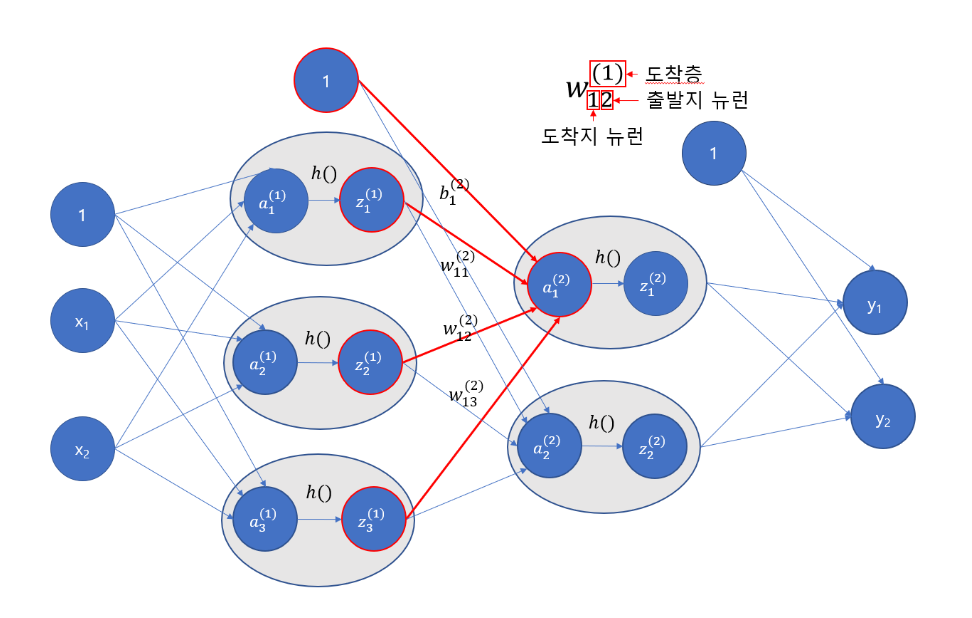

In [18]:
# 넘파이의 다차원 배열을 사용해서 입력신호, 가중치, 편향 구현!

x = np.array([1.0,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 =  np.dot(x,w1) + B1
print(A1)

[0.3 0.7 1.1]


In [19]:
# 활성화 함수로 시그모이드 함수를 사용

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [21]:
w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1,0.2])

print(Z1.shape)
print(w2.shape)
print(B2.shape)

A2 = np.dot(Z1,w2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


- 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정합니다.
- 예시로 회귀에는 항등함수를, 분류에는 시그모이드 함수를, 다중 클래서 분류에는 소프트맥스 함수를 사용하는 것이 일반적 입니다.
- 출력층의 활성화 함수에 대해서 더 깊게 알아봅시다!

In [24]:
# 구현 정리

def init_network():
    
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network
   
def forward(network,x):
    
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
       
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = identity_function(a3)
       
    return y

'''
network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y) '''

'\nnetwork = init_network()\nx = np.array([1.0,0.5])\ny = forward(network,x)\nprint(y) '

## 3.5 항등함수와 소프트맥스 함수 구현하기

일반적으로 회귀 문제에서 사용되는 향등 함수(identify function)는 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻이다.
분류 문제에 주로 사용되는 소프트맥스 함수(softmax function)은 다음과 같다.

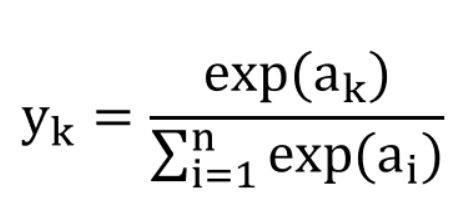

exp(x)는 ex 을 뜻하는 지수 함수이다.
n은 출력층의 뉴런 수, Yk는 그 중 k번째 출력임을 뜻한다. 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받는다.

소프트맥스 함수를 파이썬으로 표현하면 다음과 같다.

In [25]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### softmax 함수 구현 시 주의점
- 오버플로 문제!! 

지수 함수는 아주 큰 값을 내뱉기 때문에 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다.

이 문제를 해결하도록 소프트맥스 수식을 개선하면 다음과 같다.

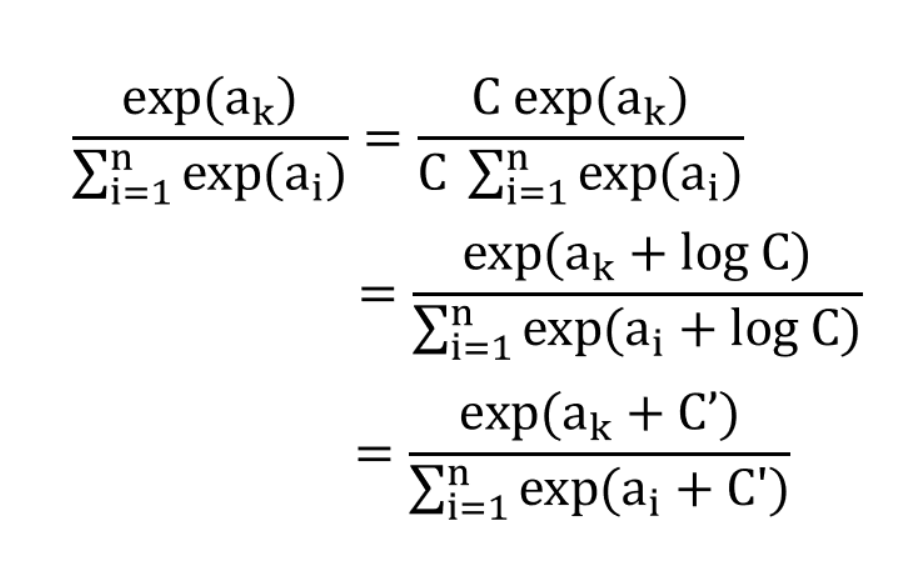

즉, C라는 임의의 정수를 분자와 분모 양쪽에 곱한 후, C를 지수 함수 exp() 안으로 옮겨 logC로 만든다. 원래 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다. 다만, C는 오버플로를 막을 목적으로 입력 신호 중 최대값을 이용하는 것이다.

In [27]:
# 수정한 소프트 맥스

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y 

우리는 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것 입니다.

- 기계학습의 문제풀이는 학습과 추론의 두 단계를 거쳐 이루어집니다. 
- 학습 단계에서 모델을 학습하고 (직접 훈련을 받고), 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)을 수행합니다.
- 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적입니다.
- 한편, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용합니다.


## 예시 적용

MNIST 데이터 셋!!

In [33]:
from keras.datasets import mnist

(x_train, t_train), (x_test, t_test)  = mnist.load_data()
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [35]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test)  = mnist.load_data()

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(28, 28)
(28, 28)


In [39]:
# 신경망의 추론 처리

import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle


# (x_train, t_train), (x_test, t_test)  = mnist.load_data()

from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, w3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))